# LLM-Powered Exploratory Data Analysis (EDA) using Python, Pandas, Gradio & Mistral

## Objective
In this notebook, we will:
- Perform manual EDA using Python and seaborn
- Identify missing values and distributions
- Use a Large Language Model (LLM) to generate intelligent EDA insights
- Build a Gradio-based AI-powered web app for EDA automation

---

## Install Required Libraries

We will use:
- `pandas` for data handling
- `matplotlib` and `seaborn` for visualizations
- `gradio` for the web interface
- `ollama` for AI-generated insights using Mistral LLM

In [2]:
# Install requried packages if dont have 
! pip install pandas seaborn matplotlib gradio ollama

## Load the Titanic Dataset
We'll start by loading the dataset into a pandas DataFrame.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r"E:\Data backup 25.6.25\Downloads\titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## View Statistical Summary
This gives basic descriptive statistics like count, mean, std deviation, etc.

In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Check for Missing Values
This shows the number of missing entries for each column.

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Plot Survival Distribution
We visualize how many passengers survived vs. not survived.

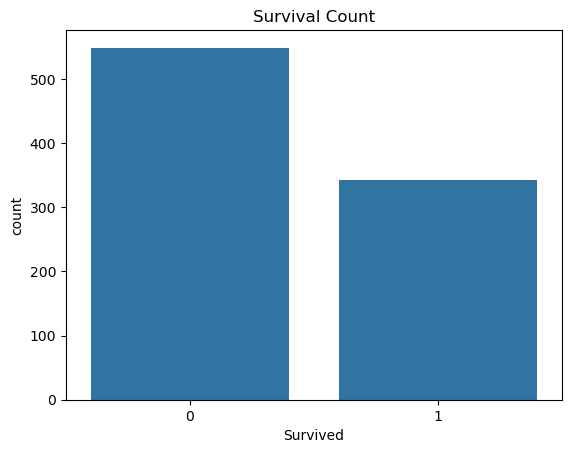

In [6]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

## What if AI Could Do All This Automatically?
Let's now use a large language model (Mistral) through `ollama` to generate insights automatically.

## AI-Generated Insights Using Mistral
We pass the summary to the LLM and get automatic interpretation.

In [8]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n -- AI-Generated Insights:\n", insights)


 -- AI-Generated Insights:
  This dataset appears to be the Titanic passenger manifest data, which includes variables such as PassengerID, Survived (1 if survived, 0 if not), Pclass (ticket class), Age, SibSp (number of siblings or spouses aboard the ship), Parch (number of parents or children aboard), and Fare.

Here are some insights from the dataset summary:

1. The total number of passengers is 891. There were no missing values for any variable in this dataset.

2. The mean age of passengers is approximately 29.7 years, with a standard deviation of around 14.53 years. This suggests a wide distribution of ages among the passengers.

3. Majority of the passengers survived (mean Survived = 0.38), but there were still many who did not survive (mean Survived = 0.62 would mean all passengers survived).

4. Most passengers traveled in 3rd class (mean Pclass = 2.31, median Pclass = 3.0), suggesting a high number of passengers traveling in the cheapest class.

5. On average, each passenger

## Create a Basic Web App for EDA Using Gradio
This app lets users upload a CSV file and get insights.

In [9]:
import gradio as gr
import pandas as pd

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)  # This should be defined separately
    return insights

# Create Web Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(label="Upload your CSV file", file_types=[".csv"]),
    outputs=gr.Textbox(label="AI-Generated Insights", lines=20),
    title="AI-Powered EDA with Mistral",
    description="""
    <div style="text-align: center;">
        <h3 style="color: #4CAF50; margin-bottom: 0;">Explore Your Dataset Instantly</h3>
        <p style="color: #555;">Upload a CSV file and get an instant, intelligent summary and analysis powered by AI.</p>
    </div>
    """,
    article="""
    <p style="text-align: center; font-size: 14px; color: gray;">
        Built using <strong>Pandas</strong> and <strong>Gradio</strong>. AI insights are generated by a custom model powered by Mistral.
        <br>Developed for automated exploratory data analysis (EDA).
    </p>
    """,
    theme="huggingface"  # You can also try "default", "soft", or "grass"
)

# Launch App
demo.launch(share=True)


C:\Users\Lenovo\anaconda3\Lib\site-packages\gradio\blocks.py:1180: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-685e9283-3fb0de2e00eacb090c3e543f;d93e573a-7699-4138-933b-dea9a97fbd20)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://34a9e0105dc7e46b81.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Final Web App with Summary, Missing Values, Insights, and Visuals
This version also adds histograms and a correlation heatmap automatically.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
import os

# Generate Insights (placeholder)
def generate_insights(summary):
    return "Key Insights:\n- Dataset has been summarized.\n- Add model-generated insights here."

# Create visualizations
def generate_visualizations(df):
    plot_paths = []
    os.makedirs("plots", exist_ok=True)

    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=20, kde=True, color="skyblue")
        plt.title(f"Distribution of {col}")
        plot_path = f"plots/{col}_hist.png"
        plt.savefig(plot_path)
        plot_paths.append(plot_path)
        plt.close()
    
    return plot_paths

# EDA function
def eda_analysis(file):
    df = pd.read_csv(file.name)

    # Fill missing values
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)

    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Summary
    summary = df.describe(include='all').to_string()
    missing = df.isnull().sum().to_string()

    # Insights and visualizations
    insights = generate_insights(summary)
    plot_paths = generate_visualizations(df)

    report = f"Summary Statistics:\n\n{summary}\n\nMissing Values:\n{missing}\n\nAI Insights:\n{insights}"
    
    return report, plot_paths

# Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(label="Upload your CSV file", file_types=[".csv"]),
    outputs=[
        gr.Textbox(label="EDA Report", lines=30),
        gr.Gallery(label="Visualizations")
    ],
    title="AI-Powered Exploratory Data Analysis",
    description="""
    Upload a CSV file to get automatic EDA insights. This includes summary statistics, missing value handling, and visualizations.
    """,
    article="""
    Built using Pandas, Seaborn, and Gradio. You can enhance this with custom models for deeper insights.
    """,
    theme="huggingface"
)

demo.launch(share=True)


C:\Users\Lenovo\anaconda3\Lib\site-packages\gradio\blocks.py:1180: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-685e9741-58cddf7b65c7c13251909fb9;24b70883-cefd-4fbd-be16-5a8fc21deaec)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://0d85562b21700e438a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\1815311375.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\1815311375.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Created dataset file at: .gradio\flagged\dataset1.csv


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\1815311375.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


## Conclusion

With just a few lines of code, we've:
- Explored the Titanic dataset manually
- Generated AI-powered summaries and visualizations
- Built two different web apps using Gradio: one simple, one advanced
- Integrated LLMs like Mistral using Ollama for smart insights

This is a scalable, interactive approach to rapid data exploration in real-world projects.